# Lab 3

## Introduction
Since the previous labs have provided a (hopefully) good foundation in the various tools that will be used, this lab will explore some of the Statistics functions available for analysis. Overall this should be a gentle introduction (or reminder) about basic statistical analysis.This lab will pick up a the dataset used in Lab 1, building on your knowledge of dataframes, this lab gives the opportunity to explore what types of functions they export for data analysis.

Some goals will be how to quickly summarize data, know how to get at specific values/features of data, understand how the data looks (statistically), and how to understand the layout of the data.

### Useful Terminology
**Mean (mu)** - The average, the sum of the numbers divided by the number of numbers.

**Mode** - The number that occurs most frequently.

**Median** - The middle number when the numbers are sorted, or with an even number of numbers the average of the two middle numbers.

**Standard Deviation (sigma)** - The dispersion from the mean. The larger the standard deviation, the more spread out the numbers are.

**Variance** - How spread out the numbers are. A Variance of zero means all numbers are the same. Similar to Standard Deviation.
___

## Exercises

### File Input
Using what you learned in the last lab read in the log (csv) file provided for you.

#### Hints
* The file name is in the "../Lab 1/ directory and is called *conn_sample.log*
* There is no header to the file
* It's *[TAB]* separated
* The fields are: 'ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes', 'conn_state', 'local_orig', 'missed_bytes', 'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'tunnel_parents', 'threat', 'sample'

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('conn_sample.log', sep="\t", header=None, names=['ts','uid','id.orig_h','id.orig_p','id.resp_h','id.resp_p','proto','service','duration','orig_bytes','resp_bytes','conn_state','local_orig','missed_bytes','history','orig_pkts','orig_ip_bytes','resp_pkts','resp_ip_bytes','tunnel_parents','threat','sample'])

<font color='blue'>
I have imported the numpy package for later use and copied the conn_sample.log to the Lab 3 directory. 
</font>

After running the above cell, run this one to verify that you've got data in the dataframe, and that it looks "correct enough".

In [2]:
df.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_orig,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,threat,sample
0,1.331901e+09,CzzTdG1vmwELxPECo6,192.168.202.79,46243,192.168.229.254,443,tcp,ssl,0.020000,539,...,-,0,ShADadfFr,8,963,13,1744,(empty),NaN,NaN
1,1.331901e+09,C3WlGc3MKqYX4yew4i,192.168.202.79,50798,192.168.229.251,80,tcp,http,0.020000,173,...,-,0,ShADfFa,4,389,3,422,(empty),NaN,NaN
2,1.331901e+09,CgyJe94ZUZCLDEm4Ed,192.168.202.79,46579,192.168.229.254,443,tcp,ssl,0.010000,547,...,-,0,ShADadfFr,8,971,13,1744,(empty),NaN,NaN
3,1.331901e+09,CwV1MF8pLSHKwAQA4,192.168.202.76,51673,149.5.45.166,80,tcp,-,3.000000,0,...,-,0,S,2,104,0,0,(empty),NaN,NaN
4,1.331901e+09,CyTR8y2igFLhViL5K3,192.168.202.79,57151,192.168.229.251,143,tcp,-,-,-,...,-,0,ShR,2,84,1,44,(empty),NaN,NaN


Once again time for data cleanup!

The cell below will, if you remember, fill all NaN valued cells with 0. The assumption here is that if Bro didn't fill in a value it's safe to set that value to zero. After that let's see what pandas determined the columns to be.

In [3]:
df = df.fillna(0)

<font color='blue'>
This means that every NaN in the threat and sample columns would be replaced with the value zero.
This is a common data cleaning technique. I think it is better to replace the NaNs with a value than dropping them entirely. 
</font>

In [4]:
df.dtypes

ts                float64
uid                object
id.orig_h          object
id.orig_p           int64
id.resp_h          object
id.resp_p           int64
proto              object
service            object
duration           object
orig_bytes         object
resp_bytes         object
conn_state         object
local_orig         object
missed_bytes        int64
history            object
orig_pkts           int64
orig_ip_bytes       int64
resp_pkts           int64
resp_ip_bytes       int64
tunnel_parents     object
threat            float64
sample            float64
dtype: object

### More Data Cleanup

In data produced by Bro, it will often put a *-* if it can't determine a value or one wasn't seen. It's likely you saw quite a few of these in the _head()_ command above. These have a couple of different effects on the data, they can cause pandas to not recognize the column as being purely numeric and because of that it won't compute data statistics for us.


#### Value substitution

The following columns need to be cleaned up this way: *orig_bytes*, *duration*, and *resp_bytes*.

It's important to understand the changes that you make to the underlying data by substituting values. First let's take a look at some of the differences, then make the changes to the rest of the columns.

First, make all Bro unknowns *-* into numpy unknowns *np.nan*, and see what that does.

In [5]:
df['orig_bytes'].apply(lambda x: np.nan if x == '-' else x).astype(np.float64).describe()

count    3.937500e+04
mean     4.065622e+05
std      2.847713e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.409522e+09
Name: orig_bytes, dtype: float64

<font color='blue'>
Here, any '-' values in the column orig_bytes are replaced with NaNs. I have replaced float64 with np.float64: 

https://stackoverflow.com/questions/34320268/valid-parameters-for-astype-in-numpy 
</font>

Then a similar change to make all Bro unknowns *-* into zeros, and check the output. 

What are some of the differences?

In [6]:
df['orig_bytes'].apply(lambda x: 0 if x == '-' else x).astype(np.float64).describe()

count    2.269430e+05
mean     7.053924e+04
std      1.186261e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.409522e+09
Name: orig_bytes, dtype: float64

<font color='blue'>
Replacing the '-' values with zeroes changes the count, mean, and standard deviation. 
</font>

Pick one method, come up with your justification, and do the assignment for all the columns listed above. This can be done using a lambda function inside the **apply()** function. A lambda (function) is an anonymous function or one that is not bound to a specific name.

A partial sample has been provided.

In [7]:
df['orig_bytes'] = df['orig_bytes'].apply(lambda x: np.nan if x == '-' else x).astype(np.float64)
df['duration'] = df['duration'].apply(lambda x: np.nan if x == '-' else x).astype(np.float64)
df['resp_bytes'] = df['resp_bytes'].apply(lambda x: np.nan if x == '-' else x).astype(np.float64)

<font color='blue'>
The columns: orig_bytes, duration, and resp_bytes mostly hold numerical values.
</font>

#### Remove un-needed columns

The columns: *ts*, *uid*, *proto*, *service*, *conn_state*, *local_orig*, *history*, *tunnel_parents*, *threat*, *sample* aren't needed for this lab. Let's get rid of them.

In [8]:
df.drop(['ts','uid','proto','service','conn_state','local_orig','history','tunnel_parents','threat','sample'], axis=1, inplace=True)

<font color='blue'>
Dropping these columns will give us a tidier and smaller dataset to work with. 
</font>

#### Change column types

Once again, in order to do analysis, columns should be set to the correct data type.

Use the information/examples above to set orig_pkts, resp_pkts, and missed_bytes to *float64* and id.orig_p and id.resp_p to *object*

In [9]:
df['orig_pkts'] = df['orig_pkts'].apply(lambda x: np.nan if x == '-' else x).astype(np.float64)
df['resp_pkts'] = df['resp_pkts'].apply(lambda x: np.nan if x == '-' else x).astype(np.float64)
df['missed_bytes'] = df['missed_bytes'].apply(lambda x: np.nan if x == '-' else x).astype(np.float64)
df['id.orig_p'] = df['id.orig_p'].apply(lambda x: np.nan if x == '-' else x).astype(object)
df['id.resp_p'] = df['id.resp_p'].apply(lambda x: np.nan if x == '-' else x).astype(object)

<font color='blue'>
Not all columns had '-' values, but applying the conditional statement won't make too much of a difference. 
</font>

Last but not least, The values of (empty) can creep into the data as well (it was seen in orig_ip_bytes and resp_ip_bytes), substitute these out for your chosen value above. Also, because later on we'll do some division, set all zeros to **np.nan** in the *resp_ip_bytes* column.

Make sure to verify that all your changes have held! 

*Hint: use the dtypes property*

In [10]:
df['orig_ip_bytes'] = df['orig_ip_bytes'].apply(lambda x: np.nan if x == '-' else x).astype(np.float64)
df['resp_ip_bytes'] = df['resp_ip_bytes'].apply(lambda x: np.nan if x == '-' or x == 0 else x).astype(np.float64)
df.dtypes

id.orig_h         object
id.orig_p         object
id.resp_h         object
id.resp_p         object
duration         float64
orig_bytes       float64
resp_bytes       float64
missed_bytes     float64
orig_pkts        float64
orig_ip_bytes    float64
resp_pkts        float64
resp_ip_bytes    float64
dtype: object

<font color='blue'>
Looking at the data, only one of the columns (tunnel_parents) had empty values and that column was already dropped. 
</font>

### Feature Engineering for More Stats!

A simple exercise on how you can combine (now 2 numeric) features to create yet another numeric feature that can give you more insight into the data.

You can perform mathematical operations on columns and assign them to a new column. Run the cell below to see how it's done, and check out some of the initial values.

In [11]:
df['out_in_ratio'] = df['orig_ip_bytes']/df['resp_ip_bytes']
df['out_in_ratio'].head()

0    0.552179
1    0.921801
2    0.556766
3         NaN
4    1.909091
Name: out_in_ratio, dtype: float64

<font color='blue'>
Feature engineering is combining multiple features to create new ones: 
    
https://en.wikipedia.org/wiki/Feature_engineering
It helps to reduce the dataset size for machine learning algorithms. It is not an easy task, but this example examines the relationship between orig_ip_bytes and resp_ip_bytes as a ratio.  

The NaN value comes from dividing a number over NaN. 
</font>

#### Statistical Summarization

As we've explored before, the **describe()** function can be used to summarize all the numerical columns in a dataframe. What happens run this is run on our our modified (and nicely cleaned up) dataframe?

Did the newly created column appear as well? Anything interesting about it?

In [12]:
df.describe()

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,out_in_ratio
count,39375.000000,3.937500e+04,3.937500e+04,226943.0,226943.000000,226943.000000,226943.000000,1.290890e+05,129089.000000
mean,1.112672,4.065622e+05,6.676380e+02,0.0,1.372472,121.946255,0.836157,2.739069e+02,1.351091
std,17.880325,2.847713e+07,1.577141e+04,0.0,6.463269,1935.458915,6.634548,9.075655e+03,0.793445
min,0.009999,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,2.800000e+01,0.000000
25%,0.010000,0.000000e+00,0.000000e+00,0.0,1.000000,44.000000,0.000000,4.000000e+01,1.100000
50%,0.020000,0.000000e+00,0.000000e+00,0.0,1.000000,48.000000,1.000000,4.000000e+01,1.500000
75%,0.100000,0.000000e+00,0.000000e+00,0.0,1.000000,60.000000,1.000000,4.000000e+01,1.500000
max,1578.140000,3.409522e+09,2.585932e+06,0.0,1034.000000,718677.000000,1894.000000,2.684428e+06,56.897436


<font color='blue'>
The standard deviation for the new column is significantly small, 0.79.
</font>

There are specific functions that allow for computing the various values one at a time. 

Try computing the Standard Deviation of *orig_ip_bytes* using the **std()** function.

In [13]:
df.orig_ip_bytes.std()

1935.4589146067328

Try computing the Variance of *orig_ip_bytes* using the **var()** function.

In [14]:
df.orig_ip_bytes.var()

3746001.2101306724

<font color='blue'>
The standard deviation is a large value. This means the distrubtion for orig_ip_bytes is wide; the values are further spead out. Indeed, the maximum value of that column is 718,677 and it has a very far distance from the mean, 121.95.
</font>

What were the results? Why do you think that's the case?

*Hint: <a href="http://en.wikipedia.org/wiki/Standard_deviation#Basic_examples">Wikipedia</a> has a great example of how to computer the Standard Deviation, and remember the variance is just the standard deviation squared*

Below the scipy stats module can be used to compute the mode. Any surprises with the result?

In [15]:
from scipy.stats.mstats import mode
f = lambda x: mode(x, axis=None)[0]
#[value, count] returned by mode()
mode(df.orig_ip_bytes)

ModeResult(mode=array([60.]), count=array([81836.]))

<font color='blue'>
This means that 60 is the most common value in orig_ip_bytes.
    
No, I am not surprised. This calculation has no relation to standard deviation, which depends on the (square root of the) average squared distance between the mean and the observations of the data. 
</font>

### Box Plots

Also known as box whisker plots, these can be used to get a good feel for how distributed the data looks. By default the box will cover the upper and lower quartiles (eg. the 25th - 75th percentile), and a red line will be at the 50th percentile. Whiskers (lines) will extend out to show the rest of the data, with (occasionally) filler points to show outliers.

Here's how to create a simple boxplot so summarize the column that was added above.

Text(0, 0.5, 'Out-In Byte Ratio')

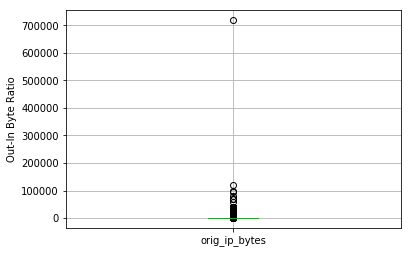

In [17]:
import matplotlib.pyplot as plt
df.boxplot(column='orig_ip_bytes')
plt.ylabel('Out-In Byte Ratio')

<font color='blue'>
I have imported the matplotlib.pyplot package to run the cell. 

Box plots are great to look at the distribution of a column:
    
https://datavizcatalogue.com/methods/box_plot.html
There are some outliers that makes it difficult to see the box plot. 
</font>

#### Slicing data

It's possible to run these functions on slices or sub-selections of the data.

Below, what happens when you run the **describe()** function on the set of numbers in *orig_ip_bytes* that are less than 200?

What about if you pass the option of **percentiles=[.3,.5,.7]** to the **describe()** function?

In [18]:
df[df.orig_ip_bytes < 200]['orig_ip_bytes'].describe()

count    219795.000000
mean         52.280238
std          11.164348
min           0.000000
25%          44.000000
50%          48.000000
75%          60.000000
max         196.000000
Name: orig_ip_bytes, dtype: float64

<font color='blue'>
This condition has changed the summary statistics. The max value is now 196 instead of 718,677. The standard deviation is significantly much smaller. 
</font>

In [19]:
df[df.orig_ip_bytes < 200]['orig_ip_bytes'].describe(percentiles=[.3,.5,.7])

count    219795.000000
mean         52.280238
std          11.164348
min           0.000000
30%          44.000000
50%          48.000000
70%          60.000000
max         196.000000
Name: orig_ip_bytes, dtype: float64

<font color='blue'>
This condition changed the percentiles from its default: 25%, 50%, 75%. Though the values that lie on those percentiles have not changed. 
</font>

#### Box plots on on slices

Run the **boxplot()** function on the *orig_ip_bytes* column, after selecting all of the values from *orig_ip_bytes* that are less than 200 (like above). 

How does the plot look different from the one above?

Text(0, 0.5, 'Out-In Byte Ratio')

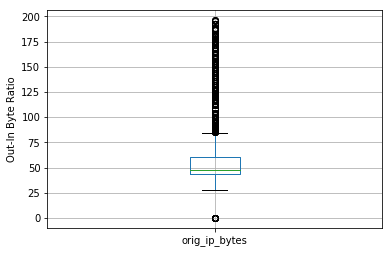

In [20]:
df[df.orig_ip_bytes < 200].boxplot(column='orig_ip_bytes')
plt.ylabel('Out-In Byte Ratio')

<font color='blue'>
This box plot looks clearer. 
</font>

### Data Distribution

It's useful to know the layout of your data for several reasons. One of them is due to some of the underlying assumptions some algorithms make on having continuous values. Or perhaps the data follows a Gaussian (normal) distribution. Using some of the techniques and functions from above you can begin to see how the data might be laid out. However, it's usful to compare it to known data sets (that follow a specific distribution).

The following examples are based on some really nice code that The Glowing Python put together, that we've hacked up to suit our specific use case.

In the first example, the numbers in the *orig_ip_bytes* are scaled (recentered around the mean), and with scikit learn (more on this later) the mean is 0 as well as the unit variance. This is a common cleaning step for Machine Learning algorithms. The scaled numbers are then compared to a randomly generated list of numbers that have the same number of numbers, and are bounded by the same min and max. The list of generated values is also computed with a given standard deviation and mean, as well as the defaults (to show how close the generated list is to "ideal". Both samples are compared against the numbers in scaled version of *orig_ip_bytes*.

What happens to the graph when you remove **scale()** from around the **df.orig_ip_bytes.tolist()** section?

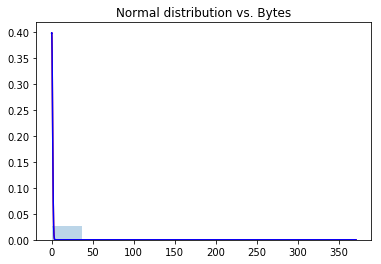

In [21]:
# original code from: http://glowingpython.blogspot.com/2012/07/distribution-fitting-with-scipy.html
from scipy.stats import norm
from numpy import linspace
from pylab import plot,show,hist,figure,title
from sklearn.preprocessing import scale

samp = scale(df.orig_ip_bytes.tolist())

param = norm.fit(samp) # distribution fitting

# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution
x = linspace(min(samp),max(samp),len(samp))
# fitted distribution
pdf_fitted = norm.pdf(x,loc=param[0],scale=param[1])
# original distribution
pdf = norm.pdf(x)

title('Normal distribution vs. Bytes')
plot(x,pdf_fitted,'r-')
plot(x,pdf,'b-')
hist(samp,density=1,alpha=.3)
show()

<font color='blue'>
Changed normed to density due to deprecation warning: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1"
</font>

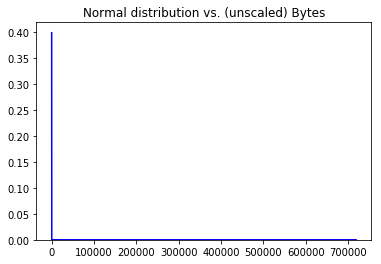

In [22]:
samp = df.orig_ip_bytes.tolist()

param = norm.fit(samp) # distribution fitting

# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution
x = linspace(min(samp),max(samp),len(samp))
# fitted distribution
pdf_fitted = norm.pdf(x,loc=param[0],scale=param[1])
# original distribution
pdf = norm.pdf(x)

title('Normal distribution vs. (unscaled) Bytes')
plot(x,pdf_fitted,'r-')
plot(x,pdf,'b-')
hist(samp,density=1,alpha=.3)
show()

<font color='blue'>
The values for orig_bytes are no longer standardize with a mean of zero and standard deviation of one. That is why the values along the x-axis are much larger in magnitude than before. 
    
Here is the doc for scale: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html

Note, there is a difference between standardization and normalization: https://machinelearningmastery.com/normalize-standardize-machine-learning-data-weka/
</font>


Same as above, except only looking at the first 100 entries in the list (to get a prettier graph).

Do you get a better insight into what happens when you remove **scale()**? What happens?

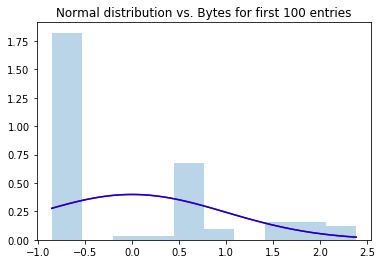

In [23]:
samp = scale(df.orig_ip_bytes.tolist()[:100])

param = norm.fit(samp) # distribution fitting

# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution
x = linspace(min(samp),max(samp),len(samp))
# fitted distribution
pdf_fitted = norm.pdf(x,loc=param[0],scale=param[1])
# original distribution
pdf = norm.pdf(x)

title('Normal distribution vs. Bytes for first 100 entries')
plot(x,pdf_fitted,'r-')
plot(x,pdf,'b-')
hist(samp,density=1,alpha=.3)
show()

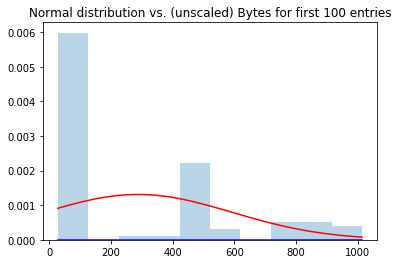

In [24]:
samp = df.orig_ip_bytes.tolist()[:100]

param = norm.fit(samp) # distribution fitting

# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution
x = linspace(min(samp),max(samp),len(samp))
# fitted distribution
pdf_fitted = norm.pdf(x,loc=param[0],scale=param[1])
# original distribution
pdf = norm.pdf(x)

title('Normal distribution vs. (unscaled) Bytes for first 100 entries')
plot(x,pdf_fitted,'r-')
plot(x,pdf,'b-')
hist(samp,density=1,alpha=.3)
show()

### More Data

Run through the exercises above (up until the Box Plot section) on the full list of numbers in the *orig_ip_bytes* column. 

What are some of the differences? How good was the random sample that was taken in the first lab?

*Hint: the file you want to read in is "./orig_ip_bytes.log". This file only contains one column, so take that into account when reading the file in. Also, no need to add the out_in_ratio columns since the other columns are present*

However, before you begin there's one last thing that will be useful to know. IPython supports cell magic functions. You can get a list of them by creating a cell and executing **%lsmagic** in it. 

First create a new cell and run *%reset out* in it (don't forget to hit 'y'). This will clear all the output, and free up a bit of memory for this next set.

Since this is a bigger dataset don't worry when some of the steps require waiting for a couple of minutes.

In [ ]:
#%lsmagic

In [25]:
df = pd.read_csv('orig_ip_bytes.log', header=None, names=['orig_ip_bytes'])

<font color='blue'>
I unzipped the folder called orig_ip_bytes.log and then copied the file directly to the Lab 3 directory.
</font>

In [26]:
df.head()

,orig_ip_bytes
0,52
1,382
2,382
3,382
4,968


In [27]:
df = df.fillna(0)

In [28]:
df.dtypes

orig_ip_bytes    int64
dtype: object

In [29]:
df['orig_ip_bytes'] = df['orig_ip_bytes'].apply(lambda x: np.nan if x == '-' else x).astype(np.float64)
df.dtypes

orig_ip_bytes    float64
dtype: object

In [30]:
df.describe()

,orig_ip_bytes
count,2.269436e+07
mean,2.811454e+02
std,2.336833e+05
min,0.000000e+00
25%,4.400000e+01
50%,4.800000e+01
75%,6.000000e+01
max,8.951564e+08


In [31]:
df.orig_ip_bytes.std()

233683.31874586598

In [32]:
df.orig_ip_bytes.var()

54607893460.082

In [33]:
from scipy.stats.mstats import mode
f = lambda x: mode(x, axis=None)[0]
#[value, count] returned by mode()
mode(df.orig_ip_bytes)

ModeResult(mode=array([60.]), count=array([8199655.]))

<font color='blue'>
Final comment: Understanding the distribution of your data is important: the shape of the data, how far the values are from the mean, outliers, etc. This step is done to prep and clean the data for analysis and modeling. This allows for the opportunity to standardize or normalize the features (the columns), or create new features (feature engineering). 
    
As the saying goes, "Data scientists spend 80% of their time cleaning and manipulating data and only 20% of their time actually analyzing it." Though, it does take some time to do. It is worth the effort to avoid "garbage" models/analysis. Scripts can be created to automate the process. 

There are many other data cleaning and preprocessing techniques available beyond this lab. Take care to be familarized with them as a toolset for any data analyst/scientist/engineer. 
</font>